In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000879635"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000879635
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,MID PENN BANCORP INC
Ticker,MPB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,8.0,2.076875e+01,6.302187e+00,11.64,1.631250e+01,22.935,2.596750e+01,26.88
interest income,17.0,1.115935e+07,4.208431e+06,7633000.00,8.158000e+06,9859000.000,1.115000e+07,22866000.00
net income,41.0,1.343951e+06,1.196127e+06,-3684000.00,8.760000e+05,1231000.000,1.901000e+06,4585000.00
net interest income,40.0,7.638900e+06,3.276874e+06,4147000.00,5.611750e+06,6492500.000,8.850750e+06,17731000.00
provision for loan losses,33.0,4.816061e+05,1.181673e+06,0.00,1.500000e+05,275000.000,4.000000e+05,7000000.00
total revenue,7.0,8.579143e+06,2.864754e+05,8170000.00,8.358500e+06,8758000.000,8.786000e+06,8837000.00


# Plots

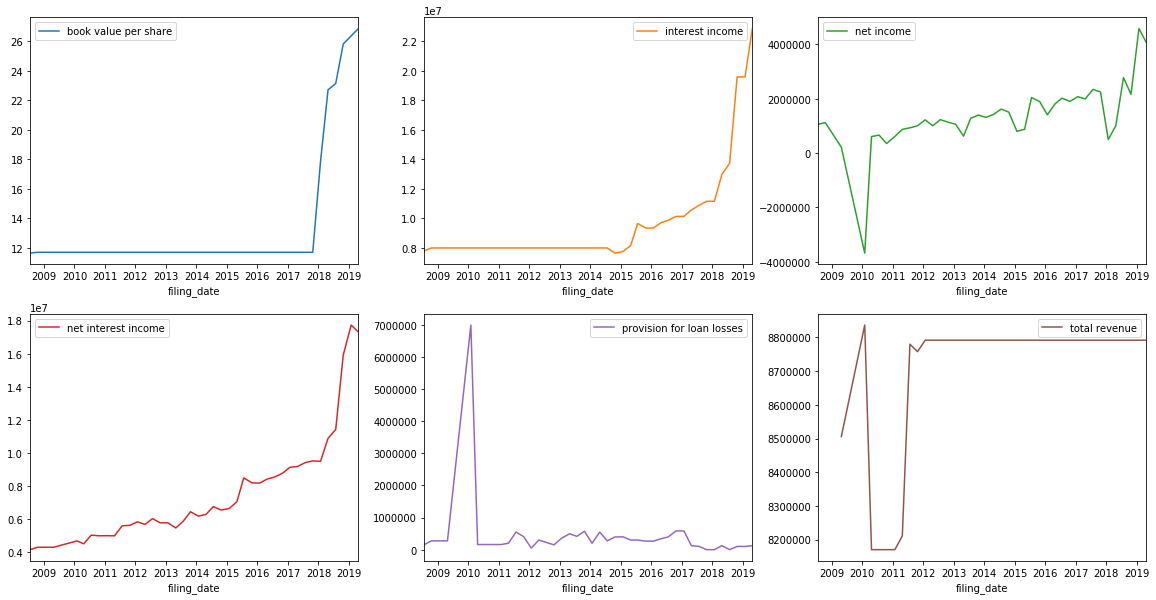

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000879635 book value per share       2008Q4 to 2017Q3: 36 periods  missing   
           interest income            2008Q4 to 2014Q2: 23 periods  missing   
           interest income                                  2015Q4  missing   
           interest income                                  2016Q4  missing   
           interest income                                  2017Q4  missing   
           interest income                                  2018Q4  missing   
           net income                                       2008Q4  missing   
           net income                  2009Q2 to 2009Q3: 2 periods  missing   
           net interest income         2008Q4 to 2009Q3: 4 periods  missing   
           provision for loan losses   2008Q4 to 2009Q3: 4 periods  missing   
           provision for loan losses   2010Q2 to 2010Q4: 3 periods  missing   
           provision for loan losses                        2015Q4  missing   
           provision for loan losses                        2016Q4  missing   
           provision for loan losses                        2017Q4  missing   
           provision for loan losses                        2018Q4  missing   
           total revenue               2008Q2 to 2008Q4: 3 periods  missing   
           total revenue               2009Q2 to 2009Q3: 2 periods  missing   
           total revenue               2010Q2 to 2010Q4: 3 periods  missing   
           total revenue              2012Q1 to 2019Q1: 29 periods  missing   

                                             message  
cik        item                                       
0000879635 book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()